In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("Ejecuciones/tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
    #for i in range(0,1):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])
    

# Fichero a Analizar

In [14]:
x, y = leeArchivo("st70.tsp")
# x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
# x, y = leeArchivo("p654.tsp")
# x, y = leeArchivo("vm1084.tsp")
# x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.0059833526611328125


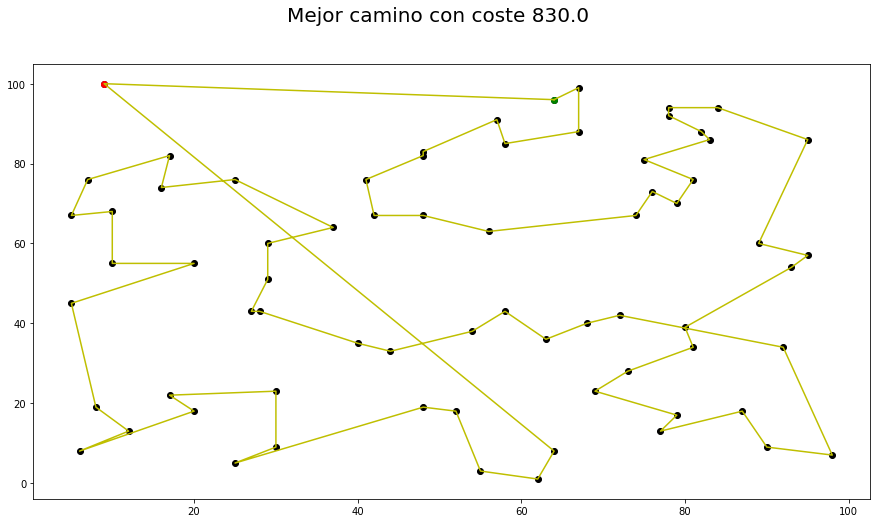

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [19]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        iterador = 0
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            iterador = iterador + 1
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,2868.0,112000.0,15.135701
1,1.0,2770.0,112000.0,14.549448
2,2.0,2809.0,112000.0,14.617955
3,3.0,2875.0,112000.0,14.908714
4,4.0,2842.0,112000.0,14.461011
5,5.0,2812.0,112000.0,14.896028
6,6.0,2780.0,112000.0,14.682062
7,7.0,2850.0,112000.0,15.320461
8,8.0,2806.0,112000.0,14.476068
9,9.0,2823.0,112000.0,14.864116


Media coste:  2823.5
Desviación típica coste:  35.08798464811946
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  14.79115641117096


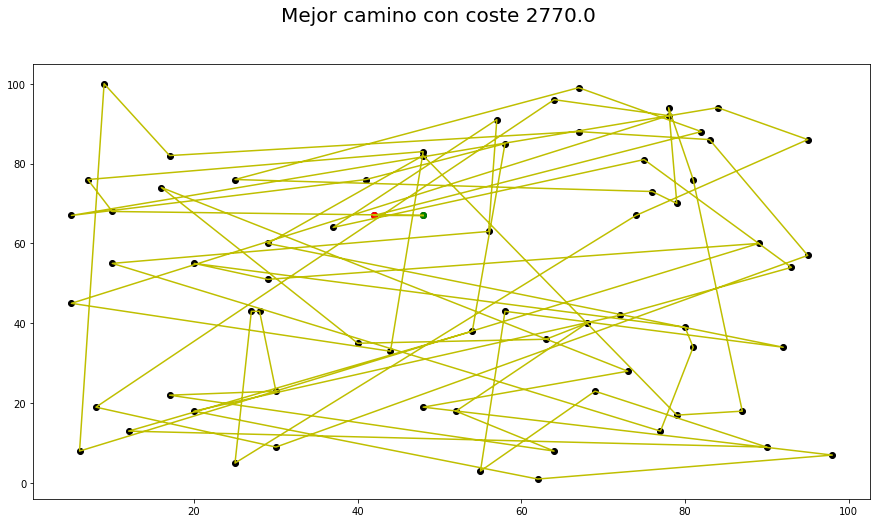

In [20]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [21]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [22]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1189.0,112000.0,0.671210
1,1.0,1267.0,112000.0,0.691352
2,2.0,1144.0,112000.0,0.621877
3,3.0,1266.0,112000.0,0.673737
4,4.0,1270.0,112000.0,0.678467
5,5.0,1358.0,112000.0,0.645221
6,6.0,1204.0,112000.0,0.777724
7,7.0,1104.0,112000.0,0.635884
8,8.0,1161.0,112000.0,0.644547
9,9.0,1305.0,112000.0,0.695148


Media coste:  1226.8
Desviación típica coste:  79.27560925166216
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  0.6735166072845459


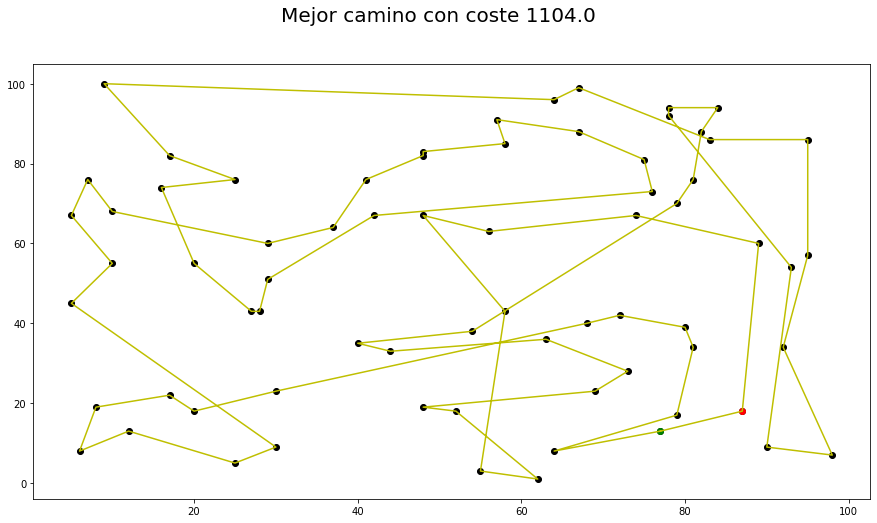

In [23]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [27]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [28]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1293.0,112000.0,0.703043
1,1.0,1148.0,61412.0,0.378433
2,2.0,1081.0,84250.0,0.548924
3,3.0,1058.0,81856.0,0.499664
4,4.0,1192.0,66207.0,0.506732
5,5.0,1026.0,86453.0,0.603684
6,6.0,973.0,98853.0,0.636947
7,7.0,1075.0,84283.0,0.631407
8,8.0,966.0,58654.0,0.372442
9,9.0,1069.0,67221.0,0.512556


Media coste:  1088.1
Desviación típica coste:  99.92936394162517
Media numero de evaluaciones:  80118.9
Desviación típica de evaluaciones:  17047.32602329305
Media tiempo:  0.5393832206726075


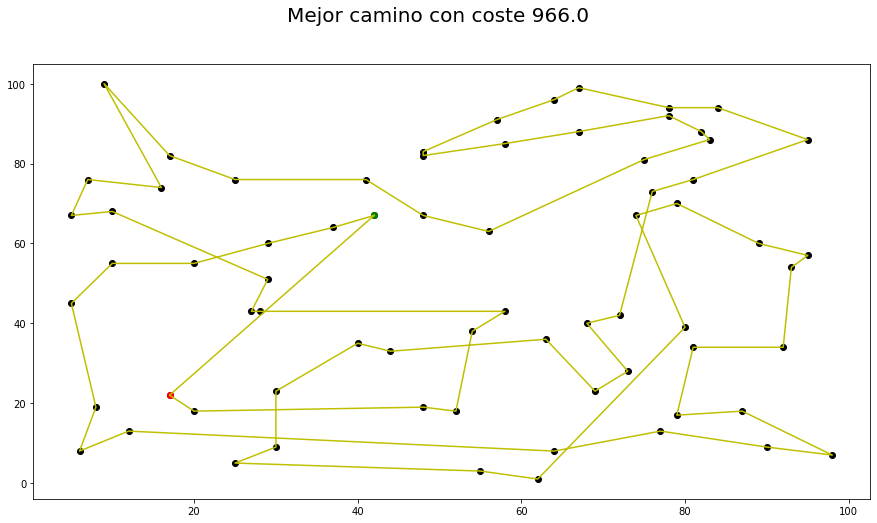

In [29]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [30]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [31]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1383.0,4095.0,0.058876
1,1.0,1298.0,3920.0,0.043877
2,2.0,1273.0,4515.0,0.043854
3,3.0,1330.0,4480.0,0.042929
4,4.0,1440.0,3325.0,0.030875
5,5.0,1543.0,2695.0,0.023961
6,6.0,1628.0,2135.0,0.024005
7,7.0,1311.0,3430.0,0.030823
8,8.0,1390.0,4165.0,0.038929
9,9.0,1513.0,3185.0,0.028890


Media coste:  1410.9
Desviación típica coste:  118.01925454960492
Media numero de evaluaciones:  3594.5
Desviación típica de evaluaciones:  783.1540574994027
Media tiempo:  0.03670177459716797


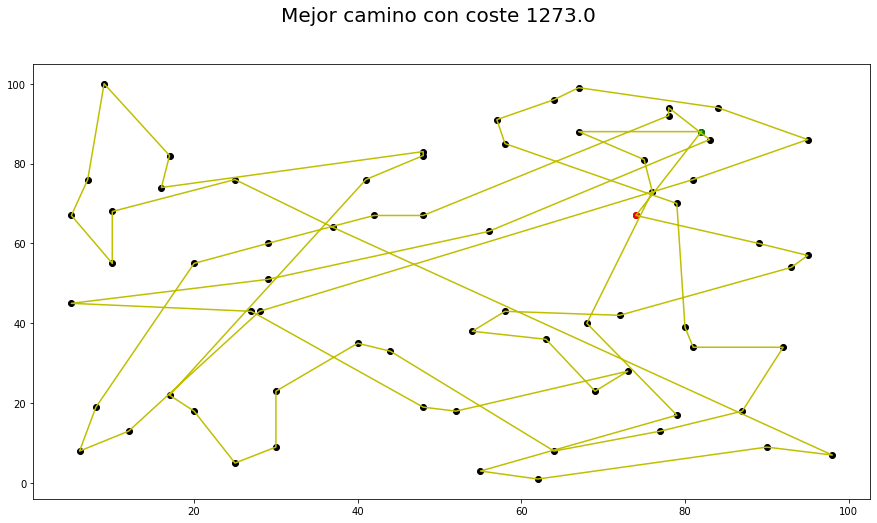

In [32]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [33]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [34]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,1263.0,112000.0,1.241511
1,1.0,913.0,112000.0,1.430491
2,2.0,1081.0,112000.0,1.388364
3,3.0,941.0,112000.0,1.272115
4,4.0,1041.0,112000.0,1.242745
5,5.0,1109.0,112000.0,1.263720
6,6.0,1016.0,112000.0,1.291573
7,7.0,1030.0,112000.0,1.171719
8,8.0,900.0,112000.0,1.239213
9,9.0,1118.0,112000.0,1.117367


Media coste:  1041.2
Desviación típica coste:  109.77127736039758
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.2658819437026978


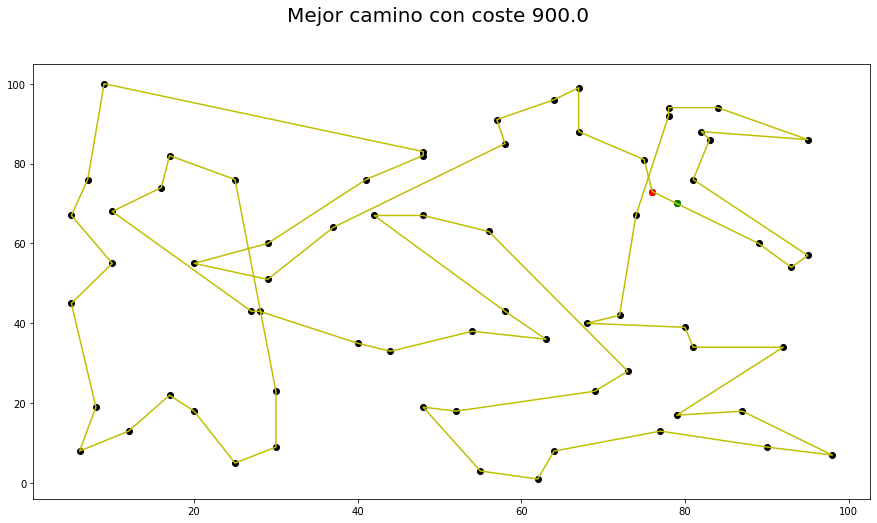

In [35]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú

In [36]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [45]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

                    # Actualizo Memoria de Frecuencias
                    #for p in range(0,n):
                    #    memoriaFrecuencias[p, mejorVecino[p]] += 1
                    
            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, mejorVecino[p]] += 1
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest
                    
                # Actualizo Memoria de Frecuencias
                #for p in range(0,n):
                #    memoriaFrecuencias[p, mejorVecino[p]] += 1

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,931.0,112000.0,1.290258
1,1.0,1029.0,112000.0,1.641077
2,2.0,1018.0,112000.0,1.227725
3,3.0,923.0,112000.0,1.388209
4,4.0,1035.0,112000.0,1.292199
5,5.0,993.0,112000.0,1.222827
6,6.0,1001.0,112000.0,1.364191
7,7.0,969.0,112000.0,1.501870
8,8.0,945.0,112000.0,1.373865
9,9.0,967.0,112000.0,1.275231


Media coste:  981.1
Desviación típica coste:  40.32217476498233
Media numero de evaluaciones:  112000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  1.3577452898025513


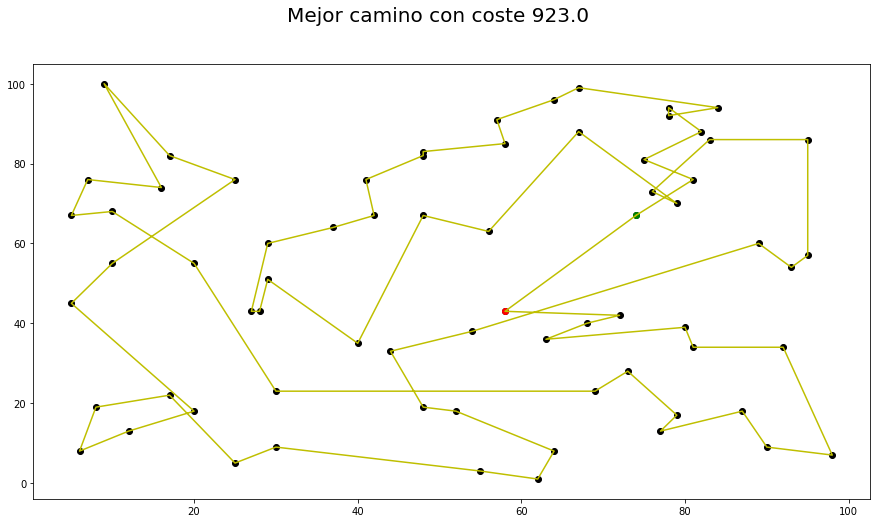

In [47]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

# Ejecucion de los archivos .tour

In [48]:
# Ejecución de Archivos .tour
def archivosTour(archivo):
    c = open("Ejecuciones/tsp/" + archivo)
    v = []   
    for linea in c:
        if int(linea) != -1:
            v.append(int(linea)-1)

    kms = calculaCoste(v)
    # pintaMapa(x,y)
    pintaCamino(v,x,y,kms)
    print("Camino = ")
    print(v)
    print("El resultado del archivo " + archivo + " es de " + str(kms) + " kilometros")

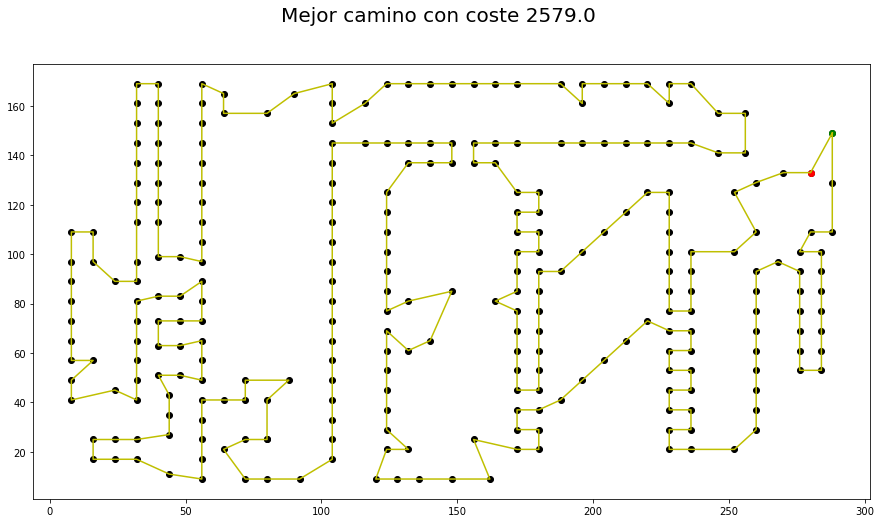

Camino = 
[0, 1, 241, 242, 243, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230, 245, 244, 246, 249, 250, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 206, 205, 204, 203, 202, 201, 200, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 175, 179, 178, 149, 177, 176, 150, 151, 155, 152, 154, 153, 128, 129, 130, 19, 20, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 156, 157, 158, 159, 174, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 170, 172, 173, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 108, 107, 109, 110, 111, 87, 86, 112, 113, 114, 116, 115, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 58, 62, 61, 117, 60, 59, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 21, 24, 22, 23, 13, 14, 12, 11, 10, 9, 8

In [49]:
# Ejecución de archivos .tour
archivo = "a280.tsp"
archivo2 = "a280.opt.tour"
x, y = leeArchivo(archivo)
calculaMatrizDistancias(x,y)
archivosTour(archivo2)